# Median Income by Zipcode

In [1]:
!pip install xlrd

In [2]:
import pandas as pd

In [3]:
df_income= pd.read_excel("MedianIncome_ZIP-3.xlsx")
df_income.head()

,Zip,Median,Mean,Pop
0,1001,56662.5735,66687.8,16445
1,1002,49853.4177,75062.6,28069
2,1003,28462.0000,35121,8491
3,1005,75423.0000,82442,4798
4,1007,79076.3540,85802,12962


In [4]:
df_income.rename(index=str, columns={"Zip": "zipcode", 
                              "Median": "median_income", 
                              "Mean": 'mean_income', 
                              'Pop': 'population'}, 
          inplace= True)
df_income.head()

,zipcode,median_income,mean_income,population
0,1001,56662.5735,66687.8,16445
1,1002,49853.4177,75062.6,28069
2,1003,28462.0000,35121,8491
3,1005,75423.0000,82442,4798
4,1007,79076.3540,85802,12962


In [6]:
nyc_geo = pd.read_csv('pluto_18v2.csv')

FileNotFoundError: File b'pluto_18v2.csv' does not exist

In [ ]:
nyc_zipcodes = list(nyc_geo.zipcode.unique())

In [160]:
nyc_zipcodes = nyc_zipcodes[:4]+nyc_zipcodes[5:]
len(nyc_zipcodes)

212

In [161]:
df_income.head()

,zipcode,median_income,mean_income,population
0,1001,56662.5735,66687.8,16445
1,1002,49853.4177,75062.6,28069
2,1003,28462.0000,35121,8491
3,1005,75423.0000,82442,4798
4,1007,79076.3540,85802,12962


In [162]:
df_income = df_income[df_income['zipcode'].isin(nyc_zipcodes)]

In [163]:
df_income.head()

,zipcode,median_income,mean_income,population
2391,10001,71244.6100,123113,17678
2392,10002,30843.9574,46258.6,70878
2393,10003,89998.5339,139331,53609
2394,10004,110183.6857,156683,1271
2395,10005,115133.2855,163763,1517


In [175]:
df_income.shape

(185, 4)

Median Rental Prices by Zipcode

In [168]:
df_rent = pd.read_csv('Zip_MedianRentalPrice_AllHomes.csv')
df_rent.head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,NaN,NaN,NaN,NaN,...,3350.0,3385.0,3400.0,3400.0,3395.0,3402.5,3380.0,3400.0,3445.0,3400.0
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,NaN,NaN,NaN,NaN,...,1800.0,1887.5,1975.0,2050.0,1950.0,1800.0,1800.0,1800.0,1720.0,1800.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,NaN,NaN,3420.0,3250.0,...,3500.0,3500.0,3500.0,3600.0,3600.0,3650.0,3790.0,3750.0,3698.5,3697.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,NaN,NaN,NaN,NaN,...,2125.0,2150.0,2100.0,2100.0,2000.0,2000.0,2000.0,2065.0,2098.0,2000.0
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,NaN,NaN,1800.0,1800.0,...,1995.0,1950.0,2075.0,2000.0,2100.0,2200.0,2000.0,2052.5,2020.0,2045.0


In [169]:
df_rent.columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       '2010-02', '2010-03', '2010-04', '2010-05',
       ...
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='object', length=114)

In [170]:
df_rent = df_rent.add_suffix('_zill')
df_rent.columns

Index(['RegionName_zill', 'City_zill', 'State_zill', 'Metro_zill',
       'CountyName_zill', 'SizeRank_zill', '2010-02_zill', '2010-03_zill',
       '2010-04_zill', '2010-05_zill',
       ...
       '2018-04_zill', '2018-05_zill', '2018-06_zill', '2018-07_zill',
       '2018-08_zill', '2018-09_zill', '2018-10_zill', '2018-11_zill',
       '2018-12_zill', '2019-01_zill'],
      dtype='object', length=114)

In [171]:
df_rent = df_rent[df_rent['RegionName_zill'].isin(nyc_zipcodes)]

In [172]:
df_rent.rename(index=str, columns = {'RegionName_zill':'zipcode'}, 
               inplace = True)

In [173]:
df_rent.head()

,zipcode,City_zill,State_zill,Metro_zill,CountyName_zill,SizeRank_zill,2010-02_zill,2010-03_zill,2010-04_zill,2010-05_zill,...,2018-04_zill,2018-05_zill,2018-06_zill,2018-07_zill,2018-08_zill,2018-09_zill,2018-10_zill,2018-11_zill,2018-12_zill,2019-01_zill
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,NaN,NaN,NaN,NaN,...,3350.0,3385.0,3400.0,3400.0,3395.0,3402.5,3380.0,3400.0,3445.0,3400.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,NaN,NaN,3420.0,3250.0,...,3500.0,3500.0,3500.0,3600.0,3600.0,3650.0,3790.0,3750.0,3698.5,3697.0
8,10002,New York,NY,New York-Newark-Jersey City,New York County,9,NaN,NaN,NaN,NaN,...,3125.0,3250.0,3195.0,3125.0,3200.0,3199.0,3112.5,3112.5,3125.0,3050.0
10,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,NaN,NaN,NaN,NaN,...,1650.0,1662.5,1699.0,1687.5,1700.0,1750.0,1800.0,1775.0,1800.0,1712.5
12,10016,New York,NY,New York-Newark-Jersey City,New York County,13,NaN,NaN,NaN,NaN,...,3450.0,3402.5,3450.0,3500.0,3500.0,3475.0,3437.5,3405.0,3400.0,3400.0


In [174]:
df_master = pd.merge(df_income, df_rent, how = 'left', on= "zipcode")
df_master.head()

,zipcode,median_income,mean_income,population,City_zill,State_zill,Metro_zill,CountyName_zill,SizeRank_zill,2010-02_zill,...,2018-04_zill,2018-05_zill,2018-06_zill,2018-07_zill,2018-08_zill,2018-09_zill,2018-10_zill,2018-11_zill,2018-12_zill,2019-01_zill
0,10001,71244.6100,123113,17678,New York,NY,New York-Newark-Jersey City,New York County,1297.0,NaN,...,3375.0,3470.0,3387.5,3387.5,3370.0,3348.0,3400.0,3370.0,3348.0,3400.0
1,10002,30843.9574,46258.6,70878,New York,NY,New York-Newark-Jersey City,New York County,9.0,NaN,...,3125.0,3250.0,3195.0,3125.0,3200.0,3199.0,3112.5,3112.5,3125.0,3050.0
2,10003,89998.5339,139331,53609,New York,NY,New York-Newark-Jersey City,New York County,45.0,NaN,...,3700.0,3800.0,3725.0,3700.0,3800.0,3800.0,3800.0,3800.0,3800.0,3750.0
3,10004,110183.6857,156683,1271,New York,NY,New York-Newark-Jersey City,New York County,3370.0,NaN,...,3950.0,4000.0,4000.0,3995.0,3972.5,3995.0,4110.0,4010.0,3995.0,3876.0
4,10005,115133.2855,163763,1517,New York,NY,New York-Newark-Jersey City,New York County,3250.0,NaN,...,3987.5,3995.0,3897.5,3907.5,3995.0,3995.0,3995.0,3910.0,3900.0,3910.0


Restaurant count by zipcode

In [188]:
df_restaurant = pd.read_csv('restaurant_count.csv')
df_restaurant.head()
df_restaurant.drop('Unnamed: 0', axis=1, inplace = True)
df_restaurant.head()

,zipcode,restaurant_count
0,10000.0,2
1,10001.0,488
2,10002.0,509
3,10003.0,682
4,10004.0,145


In [191]:

df_restaurant[pd.isnull(df_restaurant).any(axis=1)]

zipcode             0
restaurant_count    0
dtype: int64

In [212]:
df_master = pd.merge(df_master, df_restaurant,how ='left', on= "zipcode")
df_master.shape

(185, 119)

In [1]:
df_master

NameError: name 'df_master' is not defined

In [213]:
df_master.head()

,zipcode,median_income,mean_income,population,City_zill,State_zill,Metro_zill,CountyName_zill,SizeRank_zill,2010-02_zill,...,2018-06_zill,2018-07_zill,2018-08_zill,2018-09_zill,2018-10_zill,2018-11_zill,2018-12_zill,2019-01_zill,restaurant_count_x,restaurant_count_y
0,10001,71244.6100,123113,17678,New York,NY,New York-Newark-Jersey City,New York County,1297.0,NaN,...,3387.5,3387.5,3370.0,3348.0,3400.0,3370.0,3348.0,3400.0,488.0,488.0
1,10002,30843.9574,46258.6,70878,New York,NY,New York-Newark-Jersey City,New York County,9.0,NaN,...,3195.0,3125.0,3200.0,3199.0,3112.5,3112.5,3125.0,3050.0,509.0,509.0
2,10003,89998.5339,139331,53609,New York,NY,New York-Newark-Jersey City,New York County,45.0,NaN,...,3725.0,3700.0,3800.0,3800.0,3800.0,3800.0,3800.0,3750.0,682.0,682.0
3,10004,110183.6857,156683,1271,New York,NY,New York-Newark-Jersey City,New York County,3370.0,NaN,...,4000.0,3995.0,3972.5,3995.0,4110.0,4010.0,3995.0,3876.0,145.0,145.0
4,10005,115133.2855,163763,1517,New York,NY,New York-Newark-Jersey City,New York County,3250.0,NaN,...,3897.5,3907.5,3995.0,3995.0,3995.0,3910.0,3900.0,3910.0,72.0,72.0


# Exploratory analysis

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
def make_hist(series):
    return sns.distplot(series)

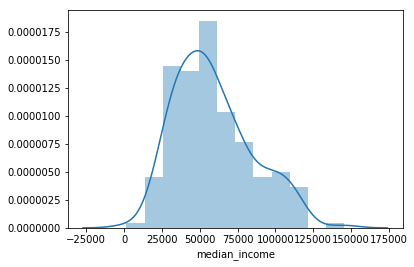

In [180]:
make_hist(df_master['median_income'])

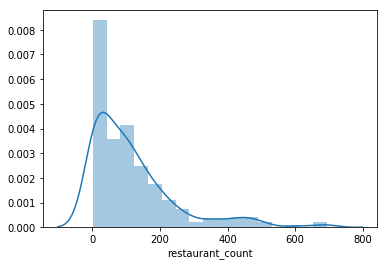

In [192]:
make_hist(df_restaurant['restaurant_count'])

In [207]:
series_med_rent = df_master['2019-01_zill']
series_med_rent.isna().sum()
# series = series.dropna(inplace = True)
# series

0

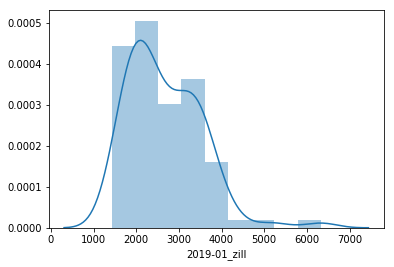

In [208]:
make_hist(series_med_rent)

In [215]:
df_master.columns

Index(['zipcode', 'median_income', 'mean_income', 'population', 'City_zill',
       'State_zill', 'Metro_zill', 'CountyName_zill', 'SizeRank_zill',
       '2010-02_zill',
       ...
       '2018-06_zill', '2018-07_zill', '2018-08_zill', '2018-09_zill',
       '2018-10_zill', '2018-11_zill', '2018-12_zill', '2019-01_zill',
       'restaurant_count_x', 'restaurant_count_y'],
      dtype='object', length=119)

In [218]:
df_master_test = df_master[['zipcode', 'median_income', 'restaurant_count_y', '2019-01_zill', 'CountyName_zill']]

In [220]:
df_master_test.dropna(inplace = True)

/Users/gracejeong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [228]:
df_master_test[['median_income', '2019-01_zill']].corr()

,median_income,2019-01_zill
median_income,1.00000,0.68469
2019-01_zill,0.68469,1.00000


In [229]:
df_master_test[['median_income', 'restaurant_count_y']].corr()

,median_income,restaurant_count_y
median_income,1.000000,0.167998
restaurant_count_y,0.167998,1.000000


In [224]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [227]:
formula = 'median_income ~ restaurant_count_y + 2019-01_zill'
lm = ols(formula, df_master_test).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

PatsyError: numbers besides '0' and '1' are only allowed with **
    median_income ~ restaurant_count_y + 2019-01_zill
                                         ^^^^

## Testing zipcode look-up by latitude-longitude 

In [231]:
!pip install pygeocoder
from pygeocoder import Geocoder

  Running setup.py bdist_wheel for pygeocoder ... done
  Stored in directory: /Users/gracejeong/Library/Caches/pip/wheels/7c/4c/00/d05c66c4af5411c554c91b8079732c8a0359c2226fb8c01031
Successfully built pygeocoder


In [239]:
coord = {'site1':'40.890848989, 73.864223918'}
df = pd.DataFrame.from_dict(coord, orient='index')
df['latitude'] = 40.890848989
df['longitude']=73.864223918
df

,0,latitude,longitude
site1,"40.890848989, 73.864223918",40.890849,73.864224


In [240]:
results = Geocoder.reverse_geocode(df['latitude'][0], df['longitude'][0])
results.street_address

GeocoderError: Error REQUEST_DENIED
Query: https://maps.google.com/maps/api/geocode/json?latlng=40.890849%2C73.864224&sensor=false&bounds=&region=&language=